In [44]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
import livelossplot

In [3]:
df = pd.read_excel('Customers2.xlsx')
df.dropna(inplace=True)
dic = {}
for i in ['Language','Country','PriorClient','MadeAPurchase']:
    encoder = LabelEncoder()
    df[i] = encoder.fit_transform(df[i])
    dic[i] = encoder


In [4]:
y = df['MadeAPurchase']

In [5]:
x = df[df.columns[:-1]]

In [6]:
df

,CustomerID,NumCalls,NumEmails,NumDownloads,NumEvents,NumForms,Language,Country,WebVisits,PageVisits,PriorClient,MadeAPurchase
0,1,33,19,1,0,1,8,11,10.0,0.0,1,0
1,2,0,1,0,1,0,5,26,61.0,0.0,0,0
2,3,4,6,2,0,0,16,16,1.0,0.0,0,0
3,4,0,10,0,0,1,5,13,26.0,0.0,0,0
4,5,7,0,0,0,0,5,26,11.0,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
748,749,3,0,0,0,0,8,4,0.0,0.0,0,1
749,750,0,4,0,0,0,8,4,0.0,0.0,0,1
750,751,15,0,0,0,0,5,13,0.0,0.0,0,1
751,752,0,1,0,0,0,16,7,0.0,0.0,1,1


In [7]:
x

,CustomerID,NumCalls,NumEmails,NumDownloads,NumEvents,NumForms,Language,Country,WebVisits,PageVisits,PriorClient
0,1,33,19,1,0,1,8,11,10.0,0.0,1
1,2,0,1,0,1,0,5,26,61.0,0.0,0
2,3,4,6,2,0,0,16,16,1.0,0.0,0
3,4,0,10,0,0,1,5,13,26.0,0.0,0
4,5,7,0,0,0,0,5,26,11.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
748,749,3,0,0,0,0,8,4,0.0,0.0,0
749,750,0,4,0,0,0,8,4,0.0,0.0,0
750,751,15,0,0,0,0,5,13,0.0,0.0,0
751,752,0,1,0,0,0,16,7,0.0,0.0,1


In [8]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.15)
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [9]:
print(lr.score(x_train,y_train))
lr.score(x_test,y_test)

0.7330754352030948


0.7162162162162162

In [10]:
x_train,x_test,y_train,y_test = np.array(x_train),np.array(x_test),np.array(y_train),np.array(y_test)

In [99]:
model = Sequential()
model.add(Dense(8,activation='tanh'))
model.add(Dense(8,activation='tanh'))
model.add(Dense(1,activation='sigmoid'))
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=1e-2,decay_steps=100000,decay_rate=0.9)
opt = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'],optimizers=opt)

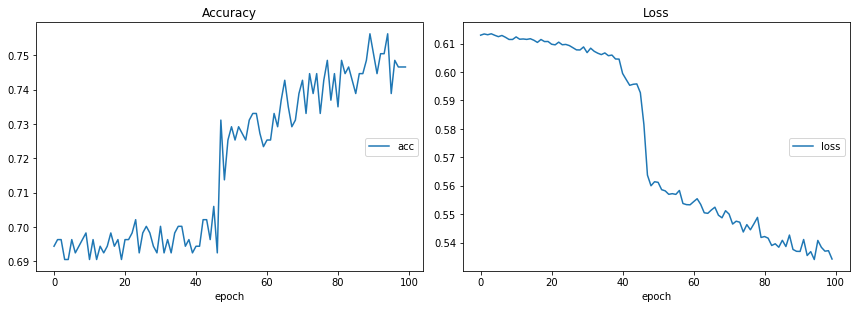

Accuracy
	acc              	 (min:    0.691, max:    0.756, cur:    0.747)
Loss
	loss             	 (min:    0.534, max:    0.613, cur:    0.534)
517/517 [==============================] - 1s 2ms/sample - loss: 0.5342 - acc: 0.7466


In [103]:
plot_losses = livelossplot.PlotLossesKeras()
model.fit(x_train,y_train,epochs=100,callbacks=[plot_losses])

In [104]:
model.evaluate(x_test,y_test)

222/222 [==============================] - 0s 294us/sample - loss: 0.5804 - acc: 0.7117


[0.5803617835044861, 0.7117117]